# CNN

In [8]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(4,4),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(4,4)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.4))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.15)

In [11]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
30/30 [==============================] - 19s 649ms/step - loss: 0.6760 - accuracy: 0.5658 - val_loss: 0.5955 - val_accuracy: 0.7009
Epoch 2/20
30/30 [==============================] - 20s 673ms/step - loss: 0.5189 - accuracy: 0.7348 - val_loss: 0.4032 - val_accuracy: 0.8333
Epoch 3/20
30/30 [==============================] - 21s 703ms/step - loss: 0.3108 - accuracy: 0.8866 - val_loss: 0.1795 - val_accuracy: 0.9444
Epoch 4/20
30/30 [==============================] - 22s 726ms/step - loss: 0.2039 - accuracy: 0.9305 - val_loss: 0.1591 - val_accuracy: 0.9402
Epoch 5/20
30/30 [==============================] - 22s 730ms/step - loss: 0.1508 - accuracy: 0.9433 - val_loss: 0.1925 - val_accuracy: 0.9103
Epoch 6/20
30/30 [==============================] - 22s 743ms/step - loss: 0.1723 - accuracy: 0.9305 - val_loss: 0.1789 - val_accuracy: 0.9402
Epoch 7/20
30/30 [==============================] - 24s 794ms/step - loss: 0.1206 - accuracy: 0.9540 - val_loss: 0.1296 - val_accuracy: 0.9530

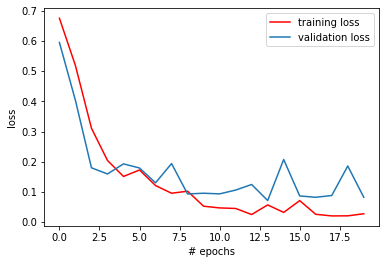

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

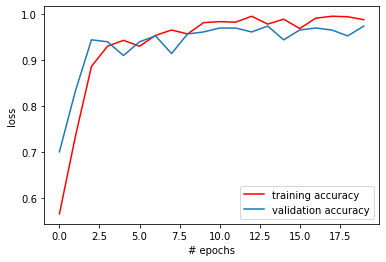

In [13]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 1s 166ms/step - loss: 0.1640 - accuracy: 0.9565
[0.16402925550937653, 0.95652174949646]
